In [67]:
import requests     # how python goes onto the internet!
import re           # regex
from BeautifulSoup import BeautifulSoup # a python HTML parser (version 3)

import tweepy 
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [ ]:
##### INDEED #####

# a job posting website (as well as resume hosting)
# scrape some (or A LOT) of job postings from indeed for the job "data scientist"
# Plan of Action:
# http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA
# 1. Figure out the url for getting the summaries (by doing it yourself!)
# 2. Scrape the summary
# 3. Figure out how to change the page by changing the URL (hint, click the next page button and see how the url changes)
# 4. BONUS: count the most used words in the sumaries


In [ ]:
#### UFO ######

# SCRAPE ALL SIGHTINGS in 2016
# Plan of action
# 1. Figure out the pattern to get a certain year and month from nuforc
# 2. Scrape each sightings
# 3. Make a dataframe out of it
# 4. make a day column
# 5. graph each day in 2016 and see which day had the most! (Is it July 4th?)

In [ ]:
##### TWITTER ######

# Create a dataframe where each row is a tweet that uses any tag (or tags) you choose!
# include a column for date, text, user handle, user name, and user image
# You can use the normal query method and not stream for this!


In [85]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = 'mSjakMUvIf3Yjpar5ympAizke'
api_secret = 'iJEmgDeDtvHg3G4uOljITRlz3355rB0xYaqew09Y0ooyX9ydmz'
access_token = '16368457-gaelbRHSCwlZBVdtqj7pNZlAPB33NZQp5EuvPSLYF'
access_secret = 'iPWYlFNy3DmHJ6rzx8GpDneLAPYsDlbrQ8JTmPQS7pyMy'

# Masahpe Key
mashape_key = '0CLvblsJOxmshWkaep4szo9CILOMp1PM3hhjsnDi4k8g8ME14o'

In [86]:
tag = '%23forge.gg'

# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object
tweets = api.search(q=tag)

In [87]:
len(tweets)

15

In [91]:
results = []

#Get the first 5000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='forge.gg').items(5000):
    results.append(tweet)

# Verify the number of items returned
print len(results)


TweepError: Twitter error response: status code = 429

In [49]:

# Create a function to convert a given list of tweets into a Pandas DataFrame.
# The DataFrame will consist of only the values, which I think might be useful for analysis...


def toDataFrame(tweets):

    df = pd.DataFrame()

    df['tweetID'] = [tweet.id for tweet in tweets]
    df['tweetText'] = [tweet.text for tweet in tweets]
    df['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    df['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    df['tweetSource'] = [tweet.source for tweet in tweets]
    df['tweetCreated'] = [tweet.created_at for tweet in tweets]
    df['coordidates'] = [tweet.coordinates for tweet in tweets]


    df['userID'] = [tweet.user.id for tweet in tweets]
    df['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    df['userName'] = [tweet.user.name for tweet in tweets]
    df['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    df['userDesc'] = [tweet.user.description for tweet in tweets]
    df['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    df['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    df['userLocation'] = [tweet.user.location for tweet in tweets]
    df['userTimezone'] = [tweet.user.time_zone for tweet in tweets]

    return df

#Pass the tweets list to the above function to create a DataFrame
df = toDataFrame(results)
df.head()

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,coordidates,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,766128326918410240,Farming invasions all day #Legion #Warcraft ht...,0,0,Forge.GG,2016-08-18 04:23:21,None,2290041973,amiyuy_,Ami Yuy,2014-01-13 18:12:24,"Can I Mog It? Project Manager | Shutterbug, Bl...",74,133,Stormwind,Pacific Time (US & Canada)
1,766076644180291584,JUKED https://t.co/bvVS9X98Gc,0,0,Forge.GG,2016-08-18 00:57:59,None,709556809757958145,MediocreJack,Mediocre Jack,2016-03-15 01:48:21,Lifelong food fan. Technology Enthusiast. Crea...,532,115,"California, USA",Pacific Time (US & Canada)
2,766074492015763456,oh god... the sound the flashlight makes in No...,0,0,Forge.GG,2016-08-18 00:49:26,None,73852679,bootsnack,Jeremy qkr,2009-09-13 09:40:51,Hey I'm qkr and I stream games and eat cheese ...,191,263,"Green Bay, WI",Central Time (US & Canada)
3,766073704052826112,RT @Forge: ITS HAPPENINGGGGG @PlayOverwatch #G...,6,0,Twitter for iPhone,2016-08-18 00:46:18,None,3919125045,Junksterr_CTR,Junky,2015-10-10 14:47:39,"Warlock/Paladin in Facepull, the premier raid ...",70,124,United States,Eastern Time (US & Canada)
4,766051034804457473,RT @Forge: ITS HAPPENINGGGGG @PlayOverwatch #G...,6,0,Twitter Web Client,2016-08-17 23:16:13,None,2442562693,Pulotski,Alex Pilaski ❄️,2014-04-13 20:31:19,Freelance eSports Video Producer/Editor & Stre...,1992,488,"Los Angeles, CA",Pacific Time (US & Canada)


In [51]:
df['tweetDate'] = df['tweetCreated'].dt.date

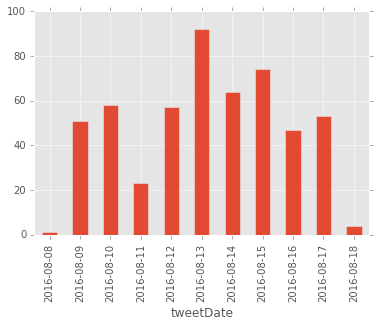

In [68]:
df.groupby('tweetDate').tweetID.count().plot(kind='bar')

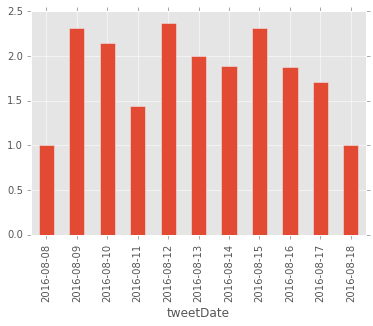

In [69]:
df.groupby('tweetDate').userID.apply(lambda x:len(x) / float(len(x.unique()))).plot(kind='bar')

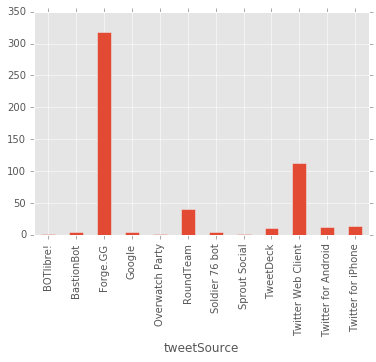

In [70]:
df.groupby('tweetSource').tweetID.count().plot(kind='bar')

In [71]:
df.tweetDate.min()

datetime.date(2016, 8, 8)

In [77]:
df.sort_index(by='tweetDate', ascending = True)

/Users/Varun/anaconda/envs/virtualenv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,coordidates,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone,tweetDate
523,762786040943939584,YAY https://t.co/wKapb6ai54,0,0,Forge.GG,2016-08-08 23:02:18,None,63497410,T3Deliciouz,T3D,2009-08-06 18:15:51,"former twitter nut, only get on to talk to old...",369,485,Florida,Quito,2016-08-08
494,763055996029718528,We released a new update with three bug fixes....,1,2,Sprout Social,2016-08-09 16:55:01,None,1249933772,Forge,Forge,2013-03-07 19:57:35,"Fast, automatic, always-on game capture. Never...",1448,425,"San Francisco, CA",Pacific Time (US & Canada),2016-08-09
493,763056421566976001,RT @Forge: We released a new update with three...,1,0,Twitter Web Client,2016-08-09 16:56:42,None,64758931,KagekiriHotS,Curtis [Kagekiri],2009-08-11 16:32:31,"Eat, sleep, game, repeat! ❤LIFE! Twitch stream...",702,1008,"Renton, WA",Pacific Time (US & Canada),2016-08-09
492,763084563467890688,Hanamura belongs to the Amaris. #Pharah #Overw...,0,0,Forge.GG,2016-08-09 18:48:32,None,2886416602,dreadravenanzu,Imperator Anzuosa,2014-11-21 01:26:45,Mama Bird. Gender fluid. @healsforaprice & I a...,2945,985,At the Pharmercy,Eastern Time (US & Canada),2016-08-09
491,763085175773429761,Those last minute #Pharah saves. #Overwatch #R...,0,0,Forge.GG,2016-08-09 18:50:57,None,2886416602,dreadravenanzu,Imperator Anzuosa,2014-11-21 01:26:45,Mama Bird. Gender fluid. @healsforaprice & I a...,2945,985,At the Pharmercy,Eastern Time (US & Canada),2016-08-09
490,763085465448751104,#Reaper #Overwatch #RankedOverwatch #Highlight...,1,2,Forge.GG,2016-08-09 18:52:07,None,2886416602,dreadravenanzu,Imperator Anzuosa,2014-11-21 01:26:45,Mama Bird. Gender fluid. @healsforaprice & I a...,2945,985,At the Pharmercy,Eastern Time (US & Canada),2016-08-09
489,763085785331560448,RT @dreadravenanzu: #Reaper #Overwatch #Ranked...,1,0,Soldier 76 bot,2016-08-09 18:53:23,None,738925282707406848,Soldier76bot,Soldier 76,2016-06-04 02:48:10,I'm just a soldier // Made with ❤️ by @aregust...,1518,2,Around my enemies,Pacific Time (US & Canada),2016-08-09
488,763086181819117568,My Voltron spirit lives on! #Pharah #Overwatch...,0,0,Forge.GG,2016-08-09 18:54:57,None,2886416602,dreadravenanzu,Imperator Anzuosa,2014-11-21 01:26:45,Mama Bird. Gender fluid. @healsforaprice & I a...,2945,985,At the Pharmercy,Eastern Time (US & Canada),2016-08-09
487,763097491092934656,"Couple of blindfire kills, then clean up the r...",0,0,Forge.GG,2016-08-09 19:39:54,None,16882799,Gorndt,Gorndt,2008-10-21 07:37:22,Product manager at Forge.gg,282,163,"San Francisco, CA",Pacific Time (US & Canada),2016-08-09
486,763097630469652480,"Tracer, you slippery bastard. https://t.co/rmY...",0,1,Forge.GG,2016-08-09 19:40:27,None,16882799,Gorndt,Gorndt,2008-10-21 07:37:22,Product manager at Forge.gg,282,163,"San Francisco, CA",Pacific Time (US & Canada),2016-08-09
